##Vanilla Version -2 : Assigment 4 

###Installing Important weapons of DNN (keras)

In [0]:
# https://keras.io/
!pip install -q keras
import keras

###Installing Keras and related core assualts for using in Neural Network

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

###Loading pre-Shuffled MNIST DataSet in Training and Test 

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

###We can confirm and see we have 60K sample images each of size 28x28, will plot and see sample images.

(60000, 28, 28)


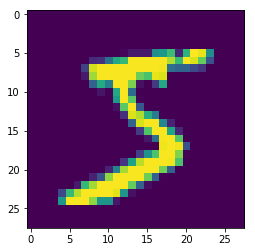

In [38]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

###Preprocess input data for Keras.
>***A full-color image with all 3 RGB channels will have a depth of 3.Our MNIST images only have a depth of 1, but we must explicitly declare that.***

>***In other words, we want to transform our dataset from having shape (n, width, height) to (n, depth, width, height)***.

In [0]:
#Converting/Reshaping 2-D dimenional Grayscale image to keras specific 4-D input/output form
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

### Final preprocessing step for the input data is to convert our data type to float32 and normalize our data values to the range

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

###Preprocess class labels for Keras.
>***let's take a look at the shape of our class label data***


In [41]:
print(y_train.shape)

(60000,)



>***We should have 10 different classes, one for each digit, but it looks like we only have a 1-dimensional array.***

>***Let's take a look at the labels for the first 10 training samples:***

In [42]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

###And there's the problem. The y_train and y_test data are not split into 10 distinct class labels, but rather are represented as a single array with the class values.

>***1. We can fix this easily:***

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

###Now have a look:

In [44]:
print (Y_train.shape)

(60000, 10)


In [45]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

##Define Model Architechture :

In [46]:
#Importing core Functions of Keras layers which will use in Neural Network
from keras.layers import Activation, BatchNormalization

#Now Will start with Sequential Model
model = Sequential()

#Adding Input Layer:
#Input Image size 28x28x1
#convolution filter/kernal size is 3x3x1 of count/row : 10
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
#BatchNorms will normalize weights using Mean, Variance of each channels pixel-wise in particular layer
model.add(BatchNormalization())

#Input image to these layer is 26x26x10
#Kernal/filter size : 3x3x10 of number/count/row : 16
model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())

#Input image to these layer is 24x24x10
#Kernal/filter size : 1x1x16 of number/count/row : 10
#1x1 convolution layer which helps to reduce channel size and increase particular features amplitude.
model.add(Convolution2D(10, 1, 1, activation='relu')) # 24

#MaxPooling2D is a way to reduce the number of parameters in our model by sliding a 2x2 pooling,
#filter across the previous layer and taking the max of the 4 values in the 2x2 filter.
model.add(MaxPooling2D(pool_size=(2, 2))) # 12

#Input image to these layer is 12x12x10
#Kernal/filter size : 3x3x10 of number/count/row : 16
model.add(Convolution2D(16, 3, 3, activation='relu')) # 10
model.add(BatchNormalization())

#Input image to these layer is 10x10x16
#Kernal/filter size : 3x3x16 of number/count/row : 16
model.add(Convolution2D(16, 3, 3, activation='relu')) # 8
model.add(BatchNormalization())

#Input image to these layer is 8x8x16
#Kernal/filter size : 3x3x16 of number/count/row : 16
model.add(Convolution2D(16, 3, 3, activation='relu')) # 6
model.add(BatchNormalization())

#Input image to these layer is 6x6x16
#Kernal/filter size : 3x3x16 of number/count/row : 16
model.add(Convolution2D(16, 3, 3, activation='relu')) # 4
model.add(BatchNormalization())

#model.add(Convolution2D(10, 1, activation='relu')) #4
model.add(Convolution2D(10, 4, 4))

#Before prediction layer we should flatten all convolution weights of neuron
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Update

In [47]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_25 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_26 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 24, 24, 10)        170       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 10, 10, 16)        1456      
__________

###Compile the Model:
>***While compile the model we need to declare Loss Function and Optimizer***

>***Here we used Adam and categorical cross entropy as optimizer and loss function respectively***


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

###Now hard part over, we need to train the model as epochs and batch size for training data and do validation with test data parallaly with each epochs

In [49]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=20, verbose=1, validation_data=(X_test,Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 195us/step - loss: 0.2082 - acc: 0.9373 - val_loss: 0.0602 - val_acc: 0.9807
Epoch 2/20
60000/60000 [==============================] - 10s 175us/step - loss: 0.0523 - acc: 0.9836 - val_loss: 0.0520 - val_acc: 0.9834
Epoch 3/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.0397 - acc: 0.9877 - val_loss: 0.0470 - val_acc: 0.9850
Epoch 4/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.0323 - acc: 0.9897 - val_loss: 0.0584 - val_acc: 0.9815
Epoch 5/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.0314 - acc: 0.9898 - val_loss: 0.0404 - val_acc: 0.9871
Epoch 6/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.0256 - acc: 0.9918 - val_loss: 0.0359 - val_acc: 0.9893
Epoch 7/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.0239 - acc: 0.9923 - val_loss: 0.0316 

###Model Observation from above log shows:
>1. In version 1 Model without BN getting better accuracy but loss was big compare to this model.
>2. Accuracy is some how closer to previous model but loss also reduced and traning time also increased.
>3. Gap between Test and Training Accuracy reduced ***13k*** params with ***99.13*** accuaracy in ***20*** epochs and ***64*** batch size.

###Now Evaluating the model on test data 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [51]:
print(score)

[0.03483150541526184, 0.99]


###Now prediction on Test data

In [0]:
y_pred = model.predict(X_test)

In [53]:
print(y_pred[:9])
print(y_test[:9])

[[3.44324889e-08 3.33217187e-08 2.88107138e-08 3.27687175e-08
  2.46457412e-12 6.61463176e-11 4.96245667e-17 9.99999881e-01
  1.81268986e-12 2.54092469e-10]
 [1.05057651e-08 1.34027722e-09 1.00000000e+00 1.92702868e-11
  3.30735216e-15 1.56919057e-18 7.37727790e-09 1.39318262e-11
  6.91592009e-12 6.17677897e-15]
 [7.66638530e-10 9.99998450e-01 1.42284960e-11 1.27993211e-12
  3.71508264e-08 9.56841606e-10 1.07431530e-09 1.48793833e-06
  1.18855314e-09 1.23759336e-09]
 [9.98847485e-01 3.77434928e-09 1.11920485e-07 1.69834641e-06
  2.12875850e-09 4.48986043e-07 1.14808755e-03 3.94921393e-08
  8.77867251e-07 1.28396130e-06]
 [2.35962322e-14 5.36033848e-12 4.61054762e-12 2.56273952e-14
  1.00000000e+00 1.98980941e-13 5.12923905e-13 3.58002683e-10
  2.62543286e-12 9.39301703e-09]
 [6.12580386e-09 9.99930620e-01 2.20292029e-09 1.58708593e-12
  1.22261270e-07 8.23997051e-11 6.53916477e-10 6.92908434e-05
  4.44192283e-09 5.95875216e-09]
 [5.76868104e-15 3.47874785e-10 2.14121522e-15 2.79930561e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

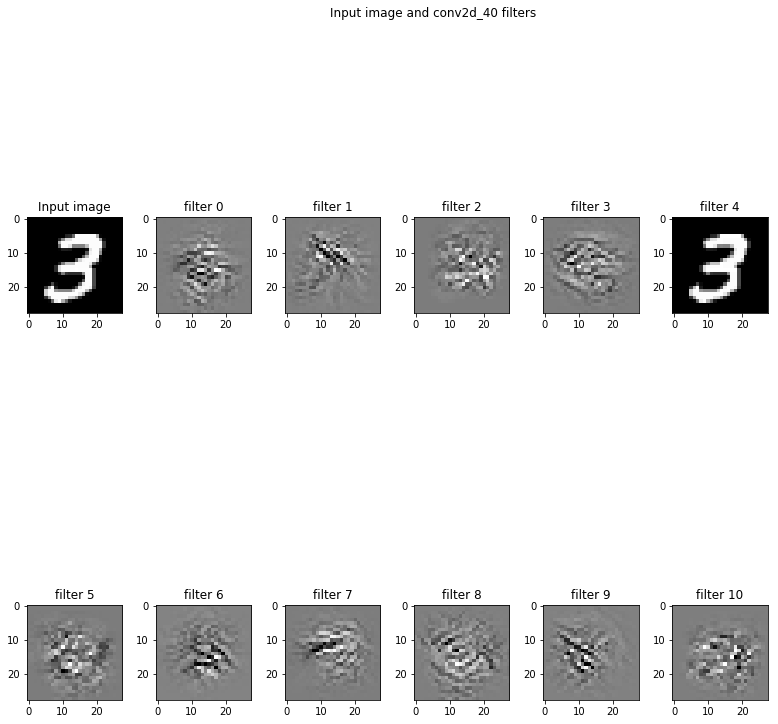

In [57]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[7]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_40'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()